# We will build LSTMs for Stocks/Crypto price tracking

In the last RNN models, we didn't see much better results even after trying multiple variations of RNN models. Also our dataset was univariate, no giving enough information to our models. So, here we will use LSTMs, far better architecture for time series data, and will also try multivariate with complex models, having multi-head attention.

*Let's get started and see how our model behaves here!*

In [4]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [5]:
import yfinance as yf

In [6]:
hdfc = yf.download(tickers=["HDFCBANK.NS"], start="2022-01-02", interval='1d')
hdfc

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
Date,,,,,
2022-01-03,1465.145264,1468.375087,1427.399420,1431.738020,4534592
2022-01-04,1473.726074,1477.920031,1453.720307,1465.482687,4428676
2022-01-05,1508.723999,1515.617576,1473.292100,1481.680130,7166319
2022-01-06,1484.524414,1498.986415,1475.172367,1487.657848,4814465
2022-01-07,1494.937012,1510.555925,1480.812435,1488.621891,5589692
...,...,...,...,...,...
2025-05-21,1926.800049,1946.900024,1921.099976,1927.000000,7566020
2025-05-22,1919.900024,1924.199951,1905.199951,1915.199951,10653335


In [7]:
df = hdfc['Close'].reset_index()
df.columns = ['date', 'Close']
df['Close'] = df['Close'].round(2)

df

,date,Close
0,2022-01-03,1465.15
1,2022-01-04,1473.73
2,2022-01-05,1508.72
3,2022-01-06,1484.52
4,2022-01-07,1494.94
...,...,...
833,2025-05-21,1926.80
834,2025-05-22,1919.90
835,2025-05-23,1933.60
836,2025-05-26,1940.20


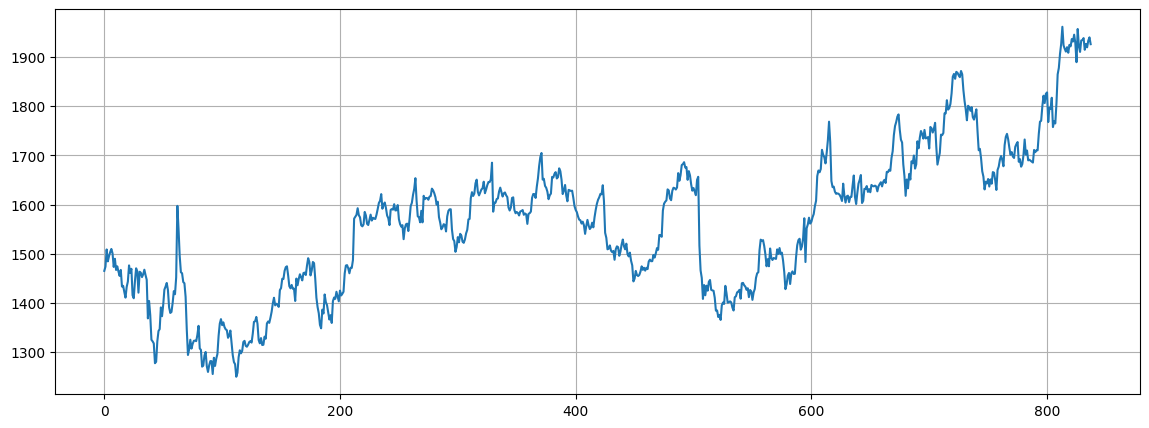

In [8]:
plt.figure(figsize=(14, 5))
plt.plot(df['Close'])

plt.grid('on')
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    838 non-null    datetime64[ns]
 1   Close   838 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.2 KB


In [10]:
level = int(len(df)*0.8)

train = df[:level]['Close'].values.reshape(-1, 1)
test = df[level:]['Close'].values.reshape(-1, 1)

train.shape, test.shape

((670, 1), (168, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

train_scaled.shape, train_scaled

((670, 1),
 array([[0.41515397],
        [0.43168767],
        [0.49911358],
        [0.45248006],
        [0.47255945],
        [0.48853432],
        [0.50107912],
        [0.48389024],
        [0.43066636],
        [0.46251975],
        [0.41858404],
        [0.43297876],
        [0.41291864],
        [0.39536363],
        [0.41877674],
        [0.35383667],
        [0.35643812],
        [0.33210005],
        [0.31036343],
        [0.35206382],
        [0.37306818],
        [0.43660153],
        [0.4071569 ],
        [0.42322812],
        [0.3194589 ],
        [0.30776198],
        [0.37418584],
        [0.42527074],
        [0.4136509 ],
        [0.32976837],
        [0.41170463],
        [0.40790843],
        [0.39071954],
        [0.40158785],
        [0.4197017 ],
        [0.39852391],
        [0.38031372],
        [0.22888966],
        [0.2970671 ],
        [0.24162716],
        [0.14500713],
        [0.1389756 ],
        [0.1306124 ],
        [0.05312753],
        [0.05871584],

In [12]:
test_scaled = scaler.transform(test)
test_scaled.shape, test_scaled

((168, 1),
 array([[0.94710371],
        [0.98294601],
        [0.9988438 ],
        [1.0201372 ],
        [1.02851967],
        [0.96916792],
        [0.92947162],
        [0.91819864],
        [0.83302501],
        [0.78610244],
        [0.70931129],
        [0.77338421],
        [0.73889082],
        [0.79525571],
        [0.77328786],
        [0.84477974],
        [0.83707172],
        [0.8673257 ],
        [0.81597102],
        [0.83273596],
        [0.92301615],
        [0.89574903],
        [0.93669788],
        [0.9633869 ],
        [0.95134312],
        [0.93361468],
        [0.96762632],
        [0.93438548],
        [0.93650518],
        [0.93958839],
        [0.89488187],
        [0.97918835],
        [0.97417813],
        [0.95741319],
        [0.97263653],
        [0.99547154],
        [0.9027826 ],
        [0.83177246],
        [0.85374032],
        [0.87753883],
        [0.94912707],
        [0.94710371],
        [0.95558253],
        [1.03266274],
        [1.03256639],

In [13]:
X_train = []
y_train = []

seq_length=50
for i in range(len(train_scaled)-seq_length):
    X_train.append(train_scaled[i:i+seq_length])
    y_train.append(train_scaled[i+seq_length])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_train, y_train

(array([[[0.41515397],
         [0.43168767],
         [0.49911358],
         ...,
         [0.18690022],
         [0.27190041],
         [0.23744556]],
 
        [[0.43168767],
         [0.49911358],
         [0.45248006],
         ...,
         [0.27190041],
         [0.23744556],
         [0.28230624]],
 
        [[0.49911358],
         [0.45248006],
         [0.47255945],
         ...,
         [0.23744556],
         [0.28230624],
         [0.34158091]],
 
        ...,
 
        [[0.76769954],
         [0.74313023],
         [0.74534628],
         ...,
         [0.80334913],
         [0.80209658],
         [0.81173161]],
 
        [[0.74313023],
         [0.74534628],
         [0.72530543],
         ...,
         [0.80209658],
         [0.81173161],
         [0.80758855]],
 
        [[0.74534628],
         [0.72530543],
         [0.71721201],
         ...,
         [0.81173161],
         [0.80758855],
         [0.85769068]]], shape=(620, 50, 1)),
 array([[0.28230624],
        [0.34

In [14]:
X_test = []
y_test = []

for i in range(len(test_scaled)-seq_length):
    X_test.append(test_scaled[i:i+seq_length])
    y_test.append(test_scaled[i+seq_length])

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test, y_test

(array([[[0.94710371],
         [0.98294601],
         [0.9988438 ],
         ...,
         [1.05279994],
         [1.06946853],
         [1.11109184]],
 
        [[0.98294601],
         [0.9988438 ],
         [1.0201372 ],
         ...,
         [1.06946853],
         [1.11109184],
         [1.17622461]],
 
        [[0.9988438 ],
         [1.0201372 ],
         [1.02851967],
         ...,
         [1.11109184],
         [1.17622461],
         [1.18711219]],
 
        ...,
 
        [[0.85075346],
         [0.8469958 ],
         [0.84362354],
         ...,
         [1.28182449],
         [1.30475585],
         [1.29145951]],
 
        [[0.8469958 ],
         [0.84362354],
         [0.83976953],
         ...,
         [1.30475585],
         [1.29145951],
         [1.31785948]],
 
        [[0.84362354],
         [0.83976953],
         [0.88919721],
         ...,
         [1.29145951],
         [1.31785948],
         [1.33057772]]], shape=(118, 50, 1)),
 array([[1.17622461],
        [1.18

In [15]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train.squeeze())
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test.squeeze())


X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([620, 50, 1]),
 torch.Size([620]),
 torch.Size([118, 50, 1]),
 torch.Size([118]))

In [16]:
from torch.utils.data import Dataset, DataLoader

In [17]:
class StockDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [18]:
train_dataset = StockDataset(X=X_train, y=y_train)
test_dataset = StockDataset(X=X_test, y=y_test)
train_dataset, test_dataset

(<__main__.StockDataset at 0x11c1f1010>,
 <__main__.StockDataset at 0x11c251bd0>)

In [19]:
len(train_dataset), train_dataset[0]

(620,
 (tensor([[0.4152],
          [0.4317],
          [0.4991],
          [0.4525],
          [0.4726],
          [0.4885],
          [0.5011],
          [0.4839],
          [0.4307],
          [0.4625],
          [0.4186],
          [0.4330],
          [0.4129],
          [0.3954],
          [0.4188],
          [0.3538],
          [0.3564],
          [0.3321],
          [0.3104],
          [0.3521],
          [0.3731],
          [0.4366],
          [0.4072],
          [0.4232],
          [0.3195],
          [0.3078],
          [0.3742],
          [0.4253],
          [0.4137],
          [0.3298],
          [0.4117],
          [0.4079],
          [0.3907],
          [0.4016],
          [0.4197],
          [0.3985],
          [0.3803],
          [0.2289],
          [0.2971],
          [0.2416],
          [0.1450],
          [0.1390],
          [0.1306],
          [0.0531],
          [0.0587],
          [0.1392],
          [0.1793],
          [0.1869],
          [0.2719],
          [0.2

In [20]:
len(test_dataset), test_dataset[0]

(118,
 (tensor([[0.9471],
          [0.9829],
          [0.9988],
          [1.0201],
          [1.0285],
          [0.9692],
          [0.9295],
          [0.9182],
          [0.8330],
          [0.7861],
          [0.7093],
          [0.7734],
          [0.7389],
          [0.7953],
          [0.7733],
          [0.8448],
          [0.8371],
          [0.8673],
          [0.8160],
          [0.8327],
          [0.9230],
          [0.8957],
          [0.9367],
          [0.9634],
          [0.9513],
          [0.9336],
          [0.9676],
          [0.9344],
          [0.9365],
          [0.9396],
          [0.8949],
          [0.9792],
          [0.9742],
          [0.9574],
          [0.9726],
          [0.9955],
          [0.9028],
          [0.8318],
          [0.8537],
          [0.8775],
          [0.9491],
          [0.9471],
          [0.9556],
          [1.0327],
          [1.0326],
          [1.0841],
          [1.0472],
          [1.0528],
          [1.0695],
          [1.1

In [21]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x11c1f12b0>,
 <torch.utils.data.dataloader.DataLoader at 0x11c251d10>)

In [22]:
for batch in test_dataloader:
    print(batch)
    break

[tensor([[[0.9471],
         [0.9829],
         [0.9988],
         [1.0201],
         [1.0285],
         [0.9692],
         [0.9295],
         [0.9182],
         [0.8330],
         [0.7861],
         [0.7093],
         [0.7734],
         [0.7389],
         [0.7953],
         [0.7733],
         [0.8448],
         [0.8371],
         [0.8673],
         [0.8160],
         [0.8327],
         [0.9230],
         [0.8957],
         [0.9367],
         [0.9634],
         [0.9513],
         [0.9336],
         [0.9676],
         [0.9344],
         [0.9365],
         [0.9396],
         [0.8949],
         [0.9792],
         [0.9742],
         [0.9574],
         [0.9726],
         [0.9955],
         [0.9028],
         [0.8318],
         [0.8537],
         [0.8775],
         [0.9491],
         [0.9471],
         [0.9556],
         [1.0327],
         [1.0326],
         [1.0841],
         [1.0472],
         [1.0528],
         [1.0695],
         [1.1111]],

        [[0.9829],
         [0.9988],
         

In [23]:
for batch in train_dataloader:
    print(batch)
    break

[tensor([[[0.9200],
         [0.7677],
         [0.7431],
         ...,
         [0.7596],
         [0.8033],
         [0.8021]],

        [[0.0398],
         [0.0439],
         [0.0833],
         ...,
         [0.2077],
         [0.1439],
         [0.1311]],

        [[0.8262],
         [0.8612],
         [0.8772],
         ...,
         [0.6249],
         [0.6541],
         [0.6780]],

        ...,

        [[0.0851],
         [0.0577],
         [0.0491],
         ...,
         [0.3980],
         [0.3553],
         [0.3468]],

        [[0.6411],
         [0.6458],
         [0.6418],
         ...,
         [0.7283],
         [0.7295],
         [0.7016]],

        [[0.6940],
         [0.7063],
         [0.7087],
         ...,
         [0.7647],
         [0.7196],
         [0.7339]]]), tensor([0.8117, 0.1518, 0.6939, 0.7063, 0.6135, 0.6123, 0.7346, 0.6962, 0.3409,
        0.1038, 0.3358, 0.5029, 0.5081, 0.5357, 0.6541, 0.1340, 0.7727, 0.3535,
        0.4329, 0.4549, 0.7785, 0.7470, 0.62

In [24]:
batch[0].shape, batch[1].shape

(torch.Size([32, 50, 1]), torch.Size([32]))

In [25]:
for batch in test_dataloader:
    print(batch)
    break

[tensor([[[0.9471],
         [0.9829],
         [0.9988],
         [1.0201],
         [1.0285],
         [0.9692],
         [0.9295],
         [0.9182],
         [0.8330],
         [0.7861],
         [0.7093],
         [0.7734],
         [0.7389],
         [0.7953],
         [0.7733],
         [0.8448],
         [0.8371],
         [0.8673],
         [0.8160],
         [0.8327],
         [0.9230],
         [0.8957],
         [0.9367],
         [0.9634],
         [0.9513],
         [0.9336],
         [0.9676],
         [0.9344],
         [0.9365],
         [0.9396],
         [0.8949],
         [0.9792],
         [0.9742],
         [0.9574],
         [0.9726],
         [0.9955],
         [0.9028],
         [0.8318],
         [0.8537],
         [0.8775],
         [0.9491],
         [0.9471],
         [0.9556],
         [1.0327],
         [1.0326],
         [1.0841],
         [1.0472],
         [1.0528],
         [1.0695],
         [1.1111]],

        [[0.9829],
         [0.9988],
         

In [26]:
batch[0].shape, batch[1].shape

(torch.Size([16, 50, 1]), torch.Size([16]))

In [27]:
len(train_dataloader), len(test_dataloader)

(20, 8)

Now our dataset is ready for RNN/LSTM models

In [28]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

device

'mps'

In [29]:
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers, nonlinearity, dropout, bidirectional):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout, bidirectional=bidirectional)
        self.linear = nn.Linear(in_features=hidden_size, out_features=output_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        output, (h, c) = self.lstm(x) # output: (batch, seq_len, hidden_size)
        output = self.linear(output[:, -1, :]) # passing only last value of hidden layer for each batch (h_n value), we can also pass mean etch for all sequences too
        return output
    
simpleLSTM = SimpleLSTM(input_size=1, output_size=1, hidden_size=64, num_layers=1, nonlinearity="tanh", dropout=0, bidirectional=False)
simpleLSTM.to(device=device)

simpleLSTM, next(simpleLSTM.parameters()).device, sum(torch.numel(i) for i in simpleLSTM.parameters() if i.requires_grad), simpleLSTM.state_dict()

KeyboardInterrupt: 

In [ ]:
epochs = 100

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=simpleLSTM.parameters(), lr=1e-3)
train_loss = []
test_loss = []

for epoch in range(epochs):
    epoch_loss = 0
    epoch_test_loss = 0

    simpleLSTM.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        preds = simpleLSTM(X)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_dataloader)
    train_loss.append(epoch_loss)

    simpleLSTM.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            X = X.to(device=device)
            y = y.to(device=device)

            preds_test = simpleLSTM(X)
            loss_test = loss_fn(preds_test, y)
            epoch_test_loss += loss_test.item()
        epoch_test_loss /= len(test_dataloader)
        test_loss.append(epoch_test_loss)

    if epoch%10==0:
        print(f"Epoch: {epoch}, Train Loss: {epoch_loss}, Test Loss: {epoch_test_loss}")


Epoch: 0, Train Loss: 0.13366671465337276, Test Loss: 0.16141815017908812
Epoch: 10, Train Loss: 0.04673592718318105, Test Loss: 0.2720926282927394
Epoch: 20, Train Loss: 0.04703498687595129, Test Loss: 0.30493784323334694
Epoch: 30, Train Loss: 0.046723021380603316, Test Loss: 0.3109194925054908
Epoch: 40, Train Loss: 0.04572287872433663, Test Loss: 0.2944325115531683
Epoch: 50, Train Loss: 0.046338459849357604, Test Loss: 0.31502840109169483
Epoch: 60, Train Loss: 0.0456228475086391, Test Loss: 0.2670492334291339
Epoch: 70, Train Loss: 0.04615528900176287, Test Loss: 0.31192802637815475
Epoch: 80, Train Loss: 0.04618193982169032, Test Loss: 0.34792933985590935


KeyboardInterrupt: 

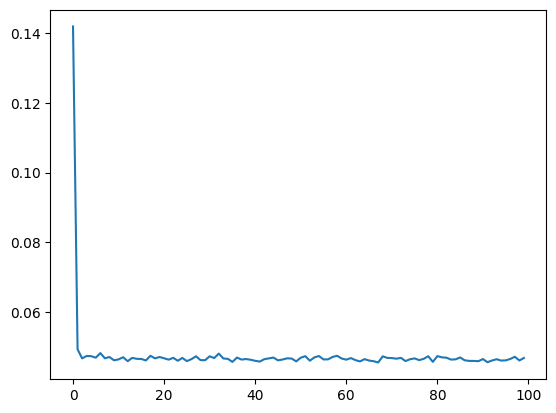

In [ ]:
plt.plot(train_loss)

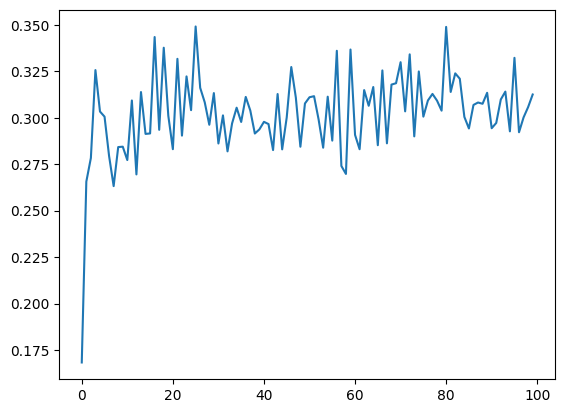

In [ ]:
plt.plot(test_loss)

In [ ]:
outputs = []
truths = []

simpleLSTM.eval()
with torch.no_grad():
    for X, y in test_dataloader:
        preds = simpleLSTM(X.to(device))
        outputs += preds.cpu()
        truths += y.cpu()

outputs = [i.item() for i in outputs]
outputs, truths

([0.5287450551986694,
  0.5299544334411621,
  0.5308862328529358,
  0.5311134457588196,
  0.5314190983772278,
  0.5315091609954834,
  0.5313653349876404,
  0.5311135053634644,
  0.5312259197235107,
  0.5311790704727173,
  0.5303401947021484,
  0.5291547775268555,
  0.5279746651649475,
  0.5267603993415833,
  0.5268191695213318,
  0.527053713798523,
  0.5271027684211731,
  0.5273213386535645,
  0.5269944667816162,
  0.5266002416610718,
  0.5266095399856567,
  0.5269700288772583,
  0.5261540412902832,
  0.5245157480239868,
  0.5234907865524292,
  0.5225409269332886,
  0.5213823318481445,
  0.5204458236694336,
  0.5193369388580322,
  0.5191254615783691,
  0.519137978553772,
  0.5194801092147827,
  0.5194006562232971,
  0.5196787118911743,
  0.5196990966796875,
  0.5202760696411133,
  0.5206907391548157,
  0.5205247402191162,
  0.5198053121566772,
  0.5202987194061279,
  0.5209766626358032,
  0.5217729806900024,
  0.5224366188049316,
  0.5225867033004761,
  0.5222278833389282,
  0.52296930

In [ ]:
otp = pd.DataFrame(outputs)
otp['nn'] = truths

otp.columns = ['outputs', 'actual']
otp

,outputs,actual
0,0.528745,tensor(1.1762)
1,0.529954,tensor(1.1871)
2,0.530886,tensor(1.1680)
3,0.531113,tensor(1.1953)
4,0.531419,tensor(1.1916)
...,...,...
113,0.534046,tensor(1.3048)
114,0.533971,tensor(1.2915)
115,0.533804,tensor(1.3179)
116,0.534029,tensor(1.3306)


[]

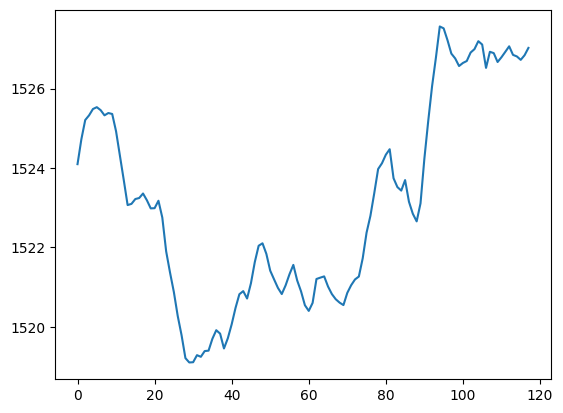

In [ ]:
plt.plot(scaler.inverse_transform(otp)[:, 0])

plt.plot()

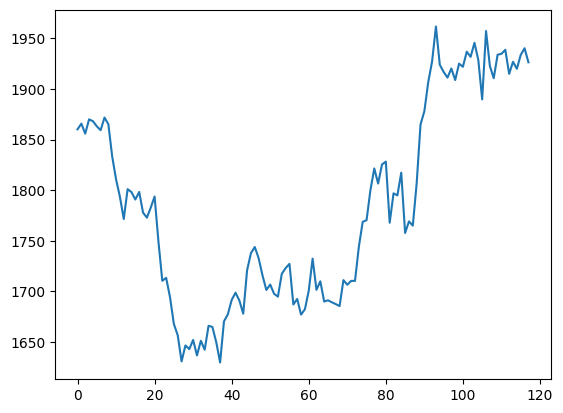

In [ ]:
plt.plot(scaler.inverse_transform(otp)[:, 1])
plt.show()

Probably we need a better model

## Stacked RNN

In [ ]:
class StackedLSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers, dropout, bidirectional):
        super().__init__()
        self.rnn = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout, bidirectional=bidirectional, batch_first=True)
        self.linear = nn.Linear(in_features=hidden_size, out_features=output_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        output, (h, c) = self.rnn(x) # output: (batch, seq_len, hidden_size)
        output = self.linear(output[:, -1, :]) # passing only last value of hidden layer for each batch (h_n value), we can also pass mean etch for all sequences too
        return output
    
stackedLSTM = StackedLSTM(input_size=1, output_size=1, hidden_size=64, num_layers=3, dropout=0, bidirectional=False)
stackedLSTM.to(device=device)

stackedLSTM, next(stackedLSTM.parameters()).device, sum(torch.numel(i) for i in stackedLSTM.parameters() if i.requires_grad), stackedLSTM.state_dict()

(StackedLSTM(
   (rnn): LSTM(1, 64, num_layers=3, batch_first=True)
   (linear): Linear(in_features=64, out_features=1, bias=True)
 ),
 device(type='mps', index=0),
 83777,
 OrderedDict([('rnn.weight_ih_l0',
               tensor([[-0.0860],
                       [ 0.0016],
                       [-0.0524],
                       [ 0.0678],
                       [ 0.1068],
                       [ 0.0193],
                       [-0.1089],
                       [ 0.0184],
                       [-0.0134],
                       [-0.0068],
                       [ 0.0911],
                       [ 0.0336],
                       [ 0.0410],
                       [-0.0975],
                       [-0.1085],
                       [ 0.1080],
                       [ 0.0575],
                       [ 0.0127],
                       [-0.0077],
                       [-0.0718],
                       [ 0.1185],
                       [-0.1190],
                       [-0.0301],
          

In [ ]:
epochs = 100

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=stackedLSTM.parameters(), lr=3e-3)
train_loss = []
test_loss = []

for epoch in range(epochs):
    epoch_loss = 0
    epoch_test_loss = 0

    stackedLSTM.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        preds = stackedLSTM(X)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_dataloader)
    train_loss.append(epoch_loss)

    stackedLSTM.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            X = X.to(device=device)
            y = y.to(device=device)

            preds_test = stackedLSTM(X)
            loss_test = loss_fn(preds_test, y)
            epoch_test_loss += loss_test.item()
        epoch_test_loss /= len(test_dataloader)
        test_loss.append(epoch_test_loss)

    if epoch%10==0:
        print(f"Epoch: {epoch}, Train Loss: {epoch_loss}, Test Loss: {epoch_test_loss}")


Epoch: 0, Train Loss: 0.0919946813955903, Test Loss: 0.26812754571437836
Epoch: 10, Train Loss: 0.04653037264943123, Test Loss: 0.3306001331657171
Epoch: 20, Train Loss: 0.04737090524286032, Test Loss: 0.3688556980341673
Epoch: 30, Train Loss: 0.04591227266937494, Test Loss: 0.2919659335166216
Epoch: 40, Train Loss: 0.046752368286252025, Test Loss: 0.32982722111046314
Epoch: 50, Train Loss: 0.046237302385270594, Test Loss: 0.31442776042968035
Epoch: 60, Train Loss: 0.047247592732310294, Test Loss: 0.3431070428341627
Epoch: 70, Train Loss: 0.046537503506988286, Test Loss: 0.33882775343954563
Epoch: 80, Train Loss: 0.04624003740027547, Test Loss: 0.3482043156400323
Epoch: 90, Train Loss: 0.0470321249216795, Test Loss: 0.3580476753413677


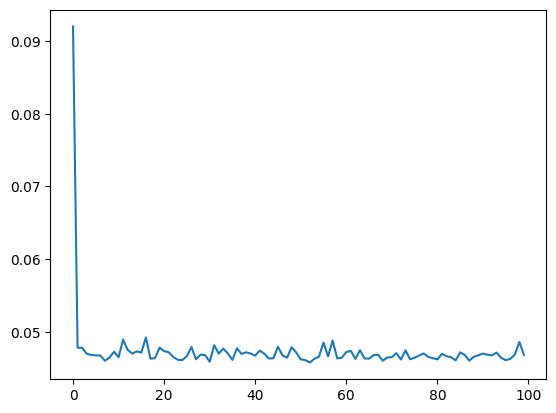

In [ ]:
plt.plot(train_loss)

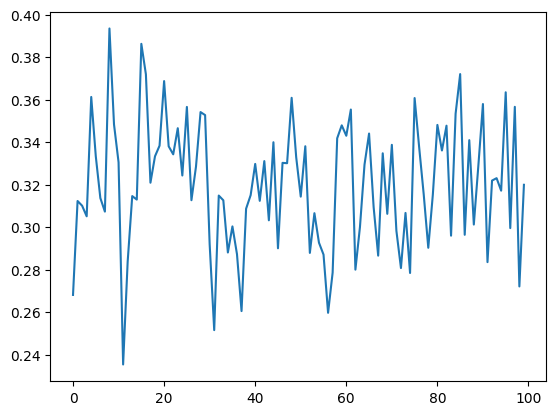

In [ ]:
plt.plot(test_loss)

In [ ]:
outputs = []
truths = []

stackedLSTM.eval()
with torch.no_grad():
    for X, y in test_dataloader:
        preds = stackedLSTM(X.to(device))
        outputs += preds.cpu()
        truths += y.cpu()

outputs = [i.item() for i in outputs]
otp = pd.DataFrame(outputs)
otp['nn'] = truths

otp.columns = ['outputs', 'actual']
otp

,outputs,actual
0,0.521827,tensor(1.1762)
1,0.522113,tensor(1.1871)
2,0.522348,tensor(1.1680)
3,0.522427,tensor(1.1953)
4,0.522507,tensor(1.1916)
...,...,...
113,0.523342,tensor(1.3048)
114,0.523315,tensor(1.2915)
115,0.523285,tensor(1.3179)
116,0.523325,tensor(1.3306)


[]

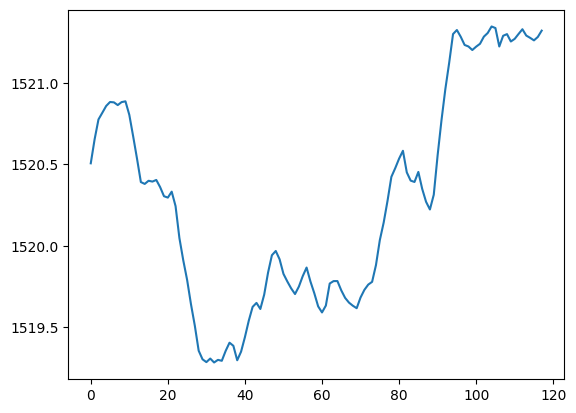

In [ ]:
plt.plot(scaler.inverse_transform(otp)[:, 0])

plt.plot()

[]

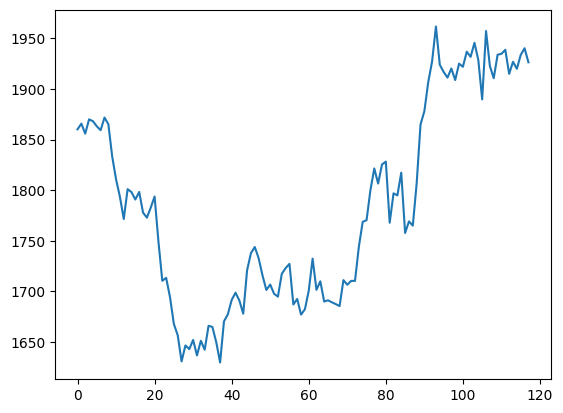

In [ ]:
plt.plot(scaler.inverse_transform(otp)[:, 1])

plt.plot()

[]

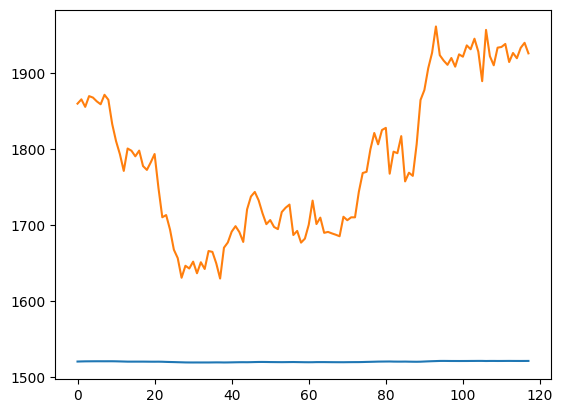

In [ ]:
plt.plot(scaler.inverse_transform(otp)[:, 0])
plt.plot(scaler.inverse_transform(otp)[:, 1])

plt.plot()

Building bidirectional stacked RNNs

In [ ]:
class BiDirectionalLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout, num_layers):
        super().__init__()
        self.rnn = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout, bidirectional=True)
        self.linear = nn.Linear(in_features=hidden_size*2, out_features=output_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        output, h = self.rnn(x)
        return self.linear(output[:, -1, :])
    
bidirLSTM = BiDirectionalLSTM(input_size=1, output_size=1, hidden_size=64, num_layers=3, dropout=0.2)
bidirLSTM.to(device=device)

bidirLSTM, next(bidirLSTM.parameters()).device, sum(torch.numel(i) for i in bidirLSTM.parameters() if i.requires_grad), bidirLSTM.state_dict()

(BiDirectionalLSTM(
   (rnn): LSTM(1, 64, num_layers=3, batch_first=True, dropout=0.2, bidirectional=True)
   (linear): Linear(in_features=128, out_features=1, bias=True)
 ),
 device(type='mps', index=0),
 233089,
 OrderedDict([('rnn.weight_ih_l0',
               tensor([[ 3.5178e-02],
                       [-1.9075e-02],
                       [ 1.0074e-01],
                       [ 2.1763e-02],
                       [-5.0428e-03],
                       [-1.0892e-01],
                       [ 3.6613e-02],
                       [ 8.9737e-02],
                       [-1.0790e-01],
                       [ 1.1904e-01],
                       [ 6.9409e-02],
                       [ 7.8211e-02],
                       [ 1.1162e-02],
                       [-5.1594e-02],
                       [-6.4465e-02],
                       [ 8.0412e-02],
                       [ 6.9311e-02],
                       [-5.7051e-03],
                       [-6.2093e-05],
                       [ 1.24

In [ ]:
epochs = 100

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=bidirLSTM.parameters(), lr=3e-3)
train_loss = []
test_loss = []

for epoch in range(epochs):
    epoch_loss = 0
    epoch_test_loss = 0

    bidirLSTM.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        preds = bidirLSTM(X)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_dataloader)
    train_loss.append(epoch_loss)

    bidirLSTM.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            X = X.to(device=device)
            y = y.to(device=device)

            preds_test = bidirLSTM(X)
            loss_test = loss_fn(preds_test, y)
            epoch_test_loss += loss_test.item()
        epoch_test_loss /= len(test_dataloader)
        test_loss.append(epoch_test_loss)

    if epoch%10==0:
        print(f"Epoch: {epoch}, Train Loss: {epoch_loss}, Test Loss: {epoch_test_loss}")


Epoch: 0, Train Loss: 0.05752413729205728, Test Loss: 0.6960083432495594
Epoch: 10, Train Loss: 0.04722705259919167, Test Loss: 0.6247701421380043
Epoch: 20, Train Loss: 0.04729429185390473, Test Loss: 0.537552373483777
Epoch: 30, Train Loss: 0.04622502811253071, Test Loss: 0.5048540085554123
Epoch: 40, Train Loss: 0.046561611257493495, Test Loss: 0.46809336729347706
Epoch: 50, Train Loss: 0.04624578375369311, Test Loss: 0.484742246568203
Epoch: 60, Train Loss: 0.04681010749191046, Test Loss: 0.4589849133044481
Epoch: 70, Train Loss: 0.04666699543595314, Test Loss: 0.4770244099199772
Epoch: 80, Train Loss: 0.04642906133085489, Test Loss: 0.3731582183390856
Epoch: 90, Train Loss: 0.046281827986240386, Test Loss: 0.36665656231343746


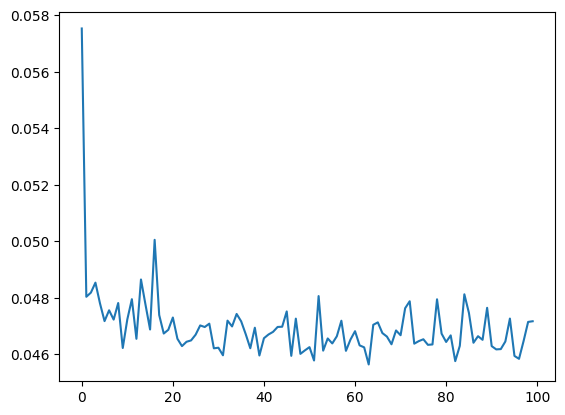

In [ ]:
plt.plot(train_loss)

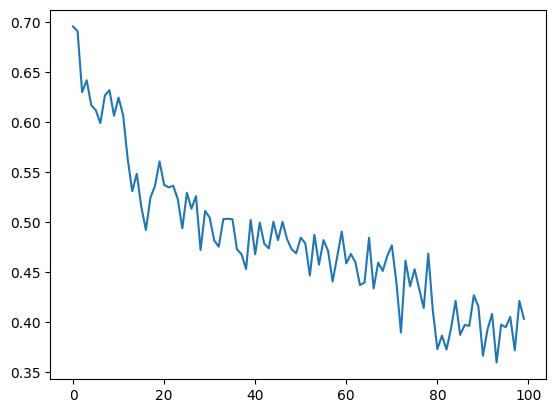

In [ ]:
plt.plot(test_loss)

In [ ]:
outputs = []
truths = []

bidirLSTM.eval()
with torch.no_grad():
    for X, y in test_dataloader:
        preds = bidirLSTM(X.to(device))
        outputs += preds.cpu()
        truths += y.cpu()

outputs = [i.item() for i in outputs]
otp = pd.DataFrame(outputs)
otp['nn'] = truths

otp.columns = ['outputs', 'actual']
otp

,outputs,actual
0,0.448180,tensor(1.1762)
1,0.448439,tensor(1.1871)
2,0.448624,tensor(1.1680)
3,0.448688,tensor(1.1953)
4,0.448799,tensor(1.1916)
...,...,...
113,0.449711,tensor(1.3048)
114,0.449716,tensor(1.2915)
115,0.449684,tensor(1.3179)
116,0.449733,tensor(1.3306)


[]

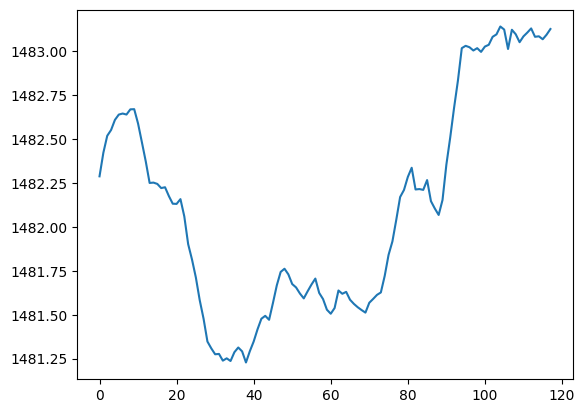

In [ ]:
plt.plot(scaler.inverse_transform(otp)[:, 0])

plt.plot()

[]

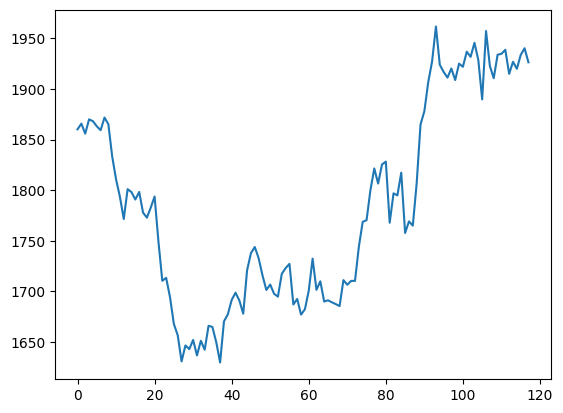

In [ ]:
plt.plot(scaler.inverse_transform(otp)[:, 1])

plt.plot()

Looks like we aren't making that good model. Let's try a custom model with
- Dropout layers
- Self attention layers
- Batch normal layers
- Residual layers

In [ ]:
class SelfAttention(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.input_size = input_size
        self.query = nn.Linear(input_size, input_size)
        self.key = nn.Linear(input_size, input_size)
        self.value = nn.Linear(input_size, input_size)

    def forward(self, x):
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)

        output_first = (Q @ K.transpose(2, 1))/(self.input_size**0.5)
        softmax_output = torch.softmax(output_first, dim=2)
        output_last = softmax_output@V

        return output_last

class CustomModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout_layers=None, attention_layers=None, batchnorm_layers=None, residual_layers=None):
        super().__init__()
        self.output_size = output_size

        self.lstm_layers = nn.ModuleList()
        self.dropouts = nn.ModuleDict()
        self.attentions = nn.ModuleDict()
        self.batchnorms = nn.ModuleDict()

        for i in range(num_layers):
            size = input_size if i==0 else hidden_size*2
            self.lstm_layers.append(
                nn.LSTM(input_size=size, hidden_size=hidden_size, num_layers=1, batch_first=True, bidirectional=True)
            )
            
            if dropout_layers and i in dropout_layers:
                self.dropouts[str(i)] = nn.Dropout(p=0.3)
            
            if batchnorm_layers and i in batchnorm_layers:
                self.batchnorms[str(i)] = nn.BatchNorm1d(num_features=hidden_size*2)

            if attention_layers and i in attention_layers:
                self.attentions[str(i)] = SelfAttention(hidden_size*2)

        self.linear = nn.Linear(in_features=hidden_size*2, out_features=output_size)
        self.residual_layers = residual_layers if residual_layers else []

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        for i, lstm in enumerate(self.lstm_layers):
            output, (hn, cn) = lstm(x)
            if str(i) in self.attentions:
                output = self.attentions[str(i)](output)

            if str(i) in self.batchnorms:
                output = self.batchnorms[str(i)](output.permute(0, 2, 1)).permute(0, 2, 1)

            if str(i) in self.dropouts:
                output = self.dropouts[str(i)](output)

            if i in self.residual_layers and x.shape == output.shape:
                output = output + x
            
            x = output

        return self.linear(x[:, -1, :])
    
model = CustomModel(input_size=1, hidden_size=64, output_size=1, num_layers=4, dropout_layers={0, 1, 2, 3}, attention_layers={0, 1, 2}, batchnorm_layers={2, 3}, residual_layers={1, 3})
model.to(device=device)

model, sum(torch.numel(i) for i in model.parameters() if i.requires_grad), next(model.parameters()).device

(CustomModel(
   (lstm_layers): ModuleList(
     (0): LSTM(1, 64, batch_first=True, bidirectional=True)
     (1-3): 3 x LSTM(128, 64, batch_first=True, bidirectional=True)
   )
   (dropouts): ModuleDict(
     (0): Dropout(p=0.3, inplace=False)
     (1): Dropout(p=0.3, inplace=False)
     (2): Dropout(p=0.3, inplace=False)
     (3): Dropout(p=0.3, inplace=False)
   )
   (attentions): ModuleDict(
     (0): SelfAttention(
       (query): Linear(in_features=128, out_features=128, bias=True)
       (key): Linear(in_features=128, out_features=128, bias=True)
       (value): Linear(in_features=128, out_features=128, bias=True)
     )
     (1): SelfAttention(
       (query): Linear(in_features=128, out_features=128, bias=True)
       (key): Linear(in_features=128, out_features=128, bias=True)
       (value): Linear(in_features=128, out_features=128, bias=True)
     )
     (2): SelfAttention(
       (query): Linear(in_features=128, out_features=128, bias=True)
       (key): Linear(in_features=1

In [ ]:
from torchinfo import summary
summary(model=model, input_size=(32, 50, 1), col_names=["input_size", "output_size", "num_params"])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
CustomModel                              [32, 50, 1]               [32, 1]                   --
├─ModuleList: 1-11                       --                        --                        (recursive)
│    └─LSTM: 2-1                         [32, 50, 1]               [32, 50, 128]             34,304
├─ModuleDict: 1-8                        --                        --                        (recursive)
│    └─SelfAttention: 2-2                [32, 50, 128]             [32, 50, 128]             --
│    │    └─Linear: 3-1                  [32, 50, 128]             [32, 50, 128]             16,512
│    │    └─Linear: 3-2                  [32, 50, 128]             [32, 50, 128]             16,512
│    │    └─Linear: 3-3                  [32, 50, 128]             [32, 50, 128]             16,512
├─ModuleDict: 1-13                       --                        --                        --
│

In [ ]:
epochs = 100

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=3e-3)
train_loss = []
test_loss = []

model.to(device=device)
for epoch in range(epochs):
    epoch_loss = 0
    epoch_test_loss = 0

    model.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        preds = model(X)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_dataloader)
    train_loss.append(epoch_loss)

    model.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            X = X.to(device=device)
            y = y.to(device=device)

            preds_test = model(X)
            loss_test = loss_fn(preds_test, y)
            epoch_test_loss += loss_test.item()
        epoch_test_loss /= len(test_dataloader)
        test_loss.append(epoch_test_loss)

    if epoch%10==0:
        print(f"Epoch: {epoch}, Train Loss: {epoch_loss}, Test Loss: {epoch_test_loss}")


Epoch: 0, Train Loss: 0.40775282606482505, Test Loss: 0.5745284035801888
Epoch: 10, Train Loss: 0.050770756974816325, Test Loss: 0.2845530156046152
Epoch: 20, Train Loss: 0.049902343191206455, Test Loss: 0.26435241382569075
Epoch: 30, Train Loss: 0.04863966703414917, Test Loss: 0.2341138506308198
Epoch: 40, Train Loss: 0.0486275777220726, Test Loss: 0.2776354756206274
Epoch: 50, Train Loss: 0.04747928269207478, Test Loss: 0.26417226903140545
Epoch: 60, Train Loss: 0.04708000244572759, Test Loss: 0.3230983642861247
Epoch: 70, Train Loss: 0.04731068592518568, Test Loss: 0.3246286232024431
Epoch: 80, Train Loss: 0.04661242123693228, Test Loss: 0.41154087893664837
Epoch: 90, Train Loss: 0.04630435449071228, Test Loss: 0.3762254863977432


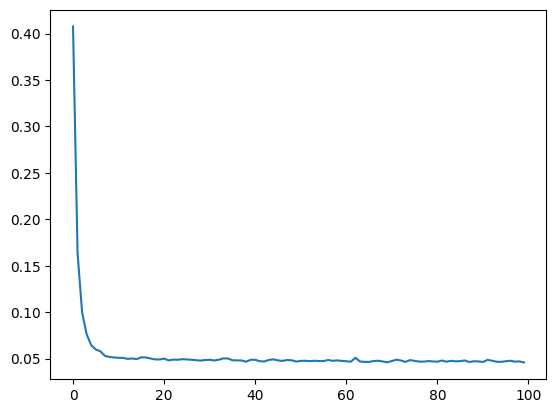

In [ ]:
plt.plot(train_loss)

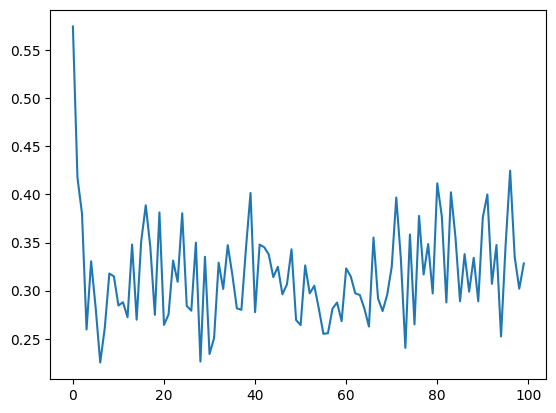

In [ ]:
plt.plot(test_loss)

In [ ]:
outputs = []
truths = []

model.eval()
with torch.no_grad():
    for X, y in test_dataloader:
        preds = model(X.to(device))
        outputs += preds.cpu()
        truths += y.cpu()

outputs = [i.item() for i in outputs]
otp = pd.DataFrame(outputs)
otp['nn'] = truths

otp.columns = ['outputs', 'actual']
otp

,outputs,actual
0,0.516039,tensor(1.1762)
1,0.516067,tensor(1.1871)
2,0.516039,tensor(1.1680)
3,0.515966,tensor(1.1953)
4,0.515828,tensor(1.1916)
...,...,...
113,0.511803,tensor(1.3048)
114,0.511722,tensor(1.2915)
115,0.511654,tensor(1.3179)
116,0.511596,tensor(1.3306)


[]

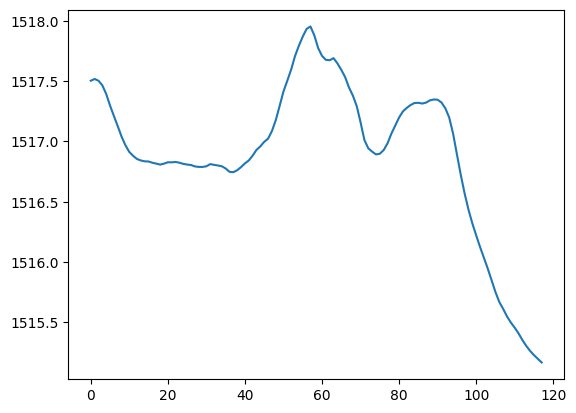

In [ ]:
plt.plot(scaler.inverse_transform(otp)[:, 0])

plt.plot()

[]

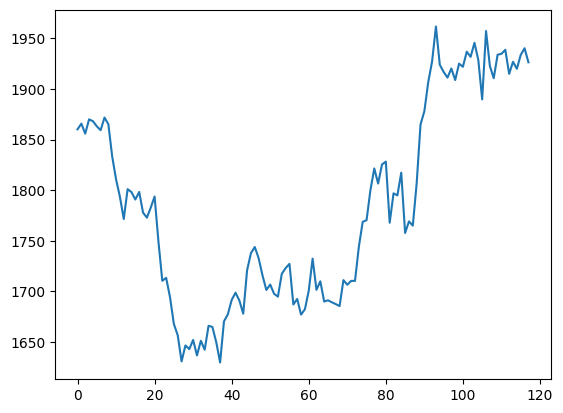

In [ ]:
plt.plot(scaler.inverse_transform(otp)[:, 1])

plt.plot()

## Multivariate models

In [264]:
df = hdfc.copy()

df['high_low_pct'] = ((df['High'] - df['Low']) / df['Close']) * 100
df['price_change'] = df['Close'].pct_change()
df['volume_change'] = df['Volume'].pct_change()

for i in [5, 10, 20 ,50]:
    df[f'MA_{i}'] = df['Close'].rolling(i).mean()
    df[f'MA_{i}_ratio'] = df['Close'].apply(lambda x: x/df[f'MA_{i}'])

for i in [12, 26]:
    df[f'EMA_{i}']= df['Close'].ewm(i).mean()
    df[f'EMA_{i}_ratio'] = df['Close'].apply(lambda x: x / df[f'EMA_{i}'])

# MACD
ema_12 = df['Close'].ewm(12).mean()
ema_26 = df['Close'].ewm(26).mean()
df['MACD'] = ema_12 - ema_26
df['signal'] = df['MACD'].ewm(9).mean()
df['histogram'] = df['MACD'] - df['signal']

# RSI
delta = df['Close'].diff()
gains = delta.where(delta>0, 0).rolling(14).mean()
losses = -delta.where(delta<0, 0).rolling(14).mean()
RS = gains/losses
df['rsi'] = 100 - (100/(1 + RS))

# Volume MA
df['volume_MA'] = df['Volume'].rolling(20).mean()
df['volume_ratio'] = df['Volume'].apply(lambda x: x / df['volume_MA'])

print("Volume calculated")
df['High_Close_ratio'] = df['High'] / df['Close']
df['Low_Close_ratio'] = df['Low'] / df['Close']

df['Volatility'] = df['Close'].rolling(window=20).std()

df['Price_trend_5'] = df['Close'] / df['Close'].shift(5) - 1
df['Price_trend_10'] = df['Close'] / df['Close'].shift(10) - 1

df['BB_middle'] = df['Close'].rolling(window=20).mean()
bb_std = df['Close'].rolling(window=20).std()
df['BB_upper'] = df['BB_middle'] + bb_std.iloc[:, 0]
df['BB_lower'] = df['BB_middle'] - bb_std.iloc[:, 0]
df['BB_width'] = (df['BB_upper'] - df['BB_lower']) / df['BB_middle']
df['BB_position'] = (df['Close'].iloc[:, 0] - df['BB_lower'].iloc[:]) / (df['BB_upper'] - df['BB_lower'])
        
# Stochastic Oscillator
low_14 = df['Low'].rolling(window=14).min()
high_14 = df['High'].rolling(window=14).max()
df['Stoch_K'] = 100 * (df['Close'] - low_14) / (high_14 - low_14)
df['Stoch_D'] = df['Stoch_K'].rolling(window=3).mean()

df

Volume calculated


Price,Close,High,Low,Open,Volume,high_low_pct,price_change,volume_change,MA_5,MA_5_ratio,MA_10,MA_10_ratio,MA_20,MA_20_ratio,MA_50,MA_50_ratio,EMA_12,EMA_12_ratio,EMA_26,EMA_26_ratio,MACD,signal,histogram,rsi,volume_MA,volume_ratio,High_Close_ratio,Low_Close_ratio,Volatility,Price_trend_5,Price_trend_10,BB_middle,BB_upper,BB_lower,BB_width,BB_position,Stoch_K,Stoch_D
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-03,1465.145264,1468.375087,1427.399420,1431.738020,4534592,2.796697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1465.145264,1.000000,1465.145264,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.002204,0.974237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,1473.726074,1477.920031,1453.720307,1465.482687,4428676,1.642077,0.005857,-0.023357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1469.607285,1.002803,1469.516620,1.002865,0.090665,0.047719,0.042947,NaN,NaN,NaN,1.002846,0.986425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,1508.723999,1515.617576,1473.292100,1481.680130,7166319,2.805382,0.023748,0.618163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1483.702647,1.016864,1483.081964,1.017290,0.620683,0.259145,0.361539,NaN,NaN,NaN,1.004569,0.976515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,1484.524414,1498.986415,1475.172367,1487.657848,4814465,1.604153,-0.016040,-0.328182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1483.933372,1.000398,1483.463240,1.000715,0.470132,0.320496,0.149636,NaN,NaN,NaN,1.009742,0.993700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07,1494.937012,1510.555925,1480.812435,1488.621891,5589692,1.989615,0.007014,0.161020,1485.411353,1.006413,NaN,NaN,NaN,NaN,NaN,NaN,1486.499699,1.005676,1485.934388,1.006059,0.565311,0.380278,0.185033,NaN,NaN,NaN,1.010448,0.990552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-21,1926.800049,1946.900024,1921.099976,1927.000000,7566020,1.339010,0.006214,-0.366306,1929.780005,0.998456,1925.749988,1.000545,1924.969995,1.000951,1839.200994,1.047629,1903.453088,1.012266,1854.007173,1.039262,49.445915,47.742782,1.703132,50.332358,10480511.90,0.721913,1.010432,0.997042,14.752734,0.008479,-0.009663,1924.969995,1939.722729,1910.217261,0.015328,0.562024,53.404609,53.404555
2025-05-22,1919.900024,1924.199951,1905.199951,1915.199951,10653335,0.989635,-0.003581,0.408050,1927.000000,0.996316,1924.889990,0.997408,1924.769995,0.997470,1843.798994,1.041274,1904.718237,1.007971,1856.447649,1.034179,48.270588,47.795563,0.475025,49.635834,10248912.60,1.039460,1.002240,0.992343,14.795056,-0.007188,-0.004459,1924.769995,1939.565051,1909.974939,0.015373,0.335419,44.192281,45.037865


In [265]:
feature_columns = [
            'Open', 'High', 'Low', 'Volume',
            'High_Low_Pct', 'Price_Change', 'Volume_Change',
            'MA_5_ratio', 'MA_10_ratio', 'MA_20_ratio', 'MA_50_ratio',
            'EMA_12_ratio', 'EMA_26_ratio',
            'MACD', 'MACD_signal', 'MACD_histogram',
            'RSI', 'BB_width', 'BB_position',
            'Stoch_K', 'Stoch_D',
            'Volume_ratio', 'High_Close_ratio', 'Low_Close_ratio',
            'Volatility', 'Price_trend_5', 'Price_trend_10', 'Close'
        ]
        
available_features = [col for col in feature_columns if col in df.columns]

features_df = df[available_features].copy()
features_df['target'] = features_df['Close'].shift(-1)

current = features_df.iloc[-1, :]
# features_df = features_df.dropna()
features_df

Price,Open,High,Low,Volume,MA_5_ratio,MA_10_ratio,MA_20_ratio,MA_50_ratio,EMA_12_ratio,EMA_26_ratio,MACD,BB_width,BB_position,Stoch_K,Stoch_D,High_Close_ratio,Low_Close_ratio,Volatility,Price_trend_5,Price_trend_10,Close,target
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,,,,,,,,,,,,,,,,,HDFCBANK.NS,
Date,,,,,,,,,,,,,,,,,,,,,,
2022-01-03,1431.738020,1468.375087,1427.399420,4534592,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1.002204,0.974237,NaN,NaN,NaN,1465.145264,1473.726074
2022-01-04,1465.482687,1477.920031,1453.720307,4428676,NaN,NaN,NaN,NaN,1.002803,1.002865,0.090665,NaN,NaN,NaN,NaN,1.002846,0.986425,NaN,NaN,NaN,1473.726074,1508.723999
2022-01-05,1481.680130,1515.617576,1473.292100,7166319,NaN,NaN,NaN,NaN,1.016864,1.017290,0.620683,NaN,NaN,NaN,NaN,1.004569,0.976515,NaN,NaN,NaN,1508.723999,1484.524414
2022-01-06,1487.657848,1498.986415,1475.172367,4814465,NaN,NaN,NaN,NaN,1.000398,1.000715,0.470132,NaN,NaN,NaN,NaN,1.009742,0.993700,NaN,NaN,NaN,1484.524414,1494.937012
2022-01-07,1488.621891,1510.555925,1480.812435,5589692,1.006413,NaN,NaN,NaN,1.005676,1.006059,0.565311,NaN,NaN,NaN,NaN,1.010448,0.990552,NaN,NaN,NaN,1494.937012,1503.228638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-21,1927.000000,1946.900024,1921.099976,7566020,0.998456,1.000545,1.000951,1.047629,1.012266,1.039262,49.445915,0.015328,0.562024,53.404609,53.404555,1.010432,0.997042,14.752734,0.008479,-0.009663,1926.800049,1919.900024
2025-05-22,1915.199951,1924.199951,1905.199951,10653335,0.996316,0.997408,0.997470,1.041274,1.007971,1.034179,48.270588,0.015373,0.335419,44.192281,45.037865,1.002240,0.992343,14.795056,-0.007188,-0.004459,1919.900024,1933.599976


In [267]:
features_df.isna().sum().max()

np.int64(49)

In [268]:
features_df = features_df.iloc[features_df.isna().sum().max():, :]
features_df

Price,Open,High,Low,Volume,MA_5_ratio,MA_10_ratio,MA_20_ratio,MA_50_ratio,EMA_12_ratio,EMA_26_ratio,MACD,BB_width,BB_position,Stoch_K,Stoch_D,High_Close_ratio,Low_Close_ratio,Volatility,Price_trend_5,Price_trend_10,Close,target
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,,,,,,,,,,,,,,,,,HDFCBANK.NS,
Date,,,,,,,,,,,,,,,,,,,,,,
2022-03-15,1391.726504,1397.511304,1361.115270,9433964,1.013206,1.032516,0.993047,0.960231,0.994661,0.977920,-23.629673,0.094103,0.426116,56.482623,54.935748,1.017907,0.991397,65.050620,0.072450,-0.001578,1372.925903,1396.209717
2022-03-16,1395.100940,1402.814007,1384.688253,6682054,1.019221,1.044431,1.012347,0.977459,1.010618,0.994742,-22.049912,0.090395,0.636591,85.351165,68.751310,1.004730,0.991748,62.335730,0.056157,0.053775,1396.209717,1426.965698
2022-03-17,1419.204377,1436.365999,1417.806431,7411977,1.029020,1.059108,1.035940,0.999645,1.030233,1.015925,-19.507670,0.087685,0.909874,95.070777,78.968188,1.006588,0.993581,60.391585,0.062720,0.079541,1426.965698,1433.184204
2022-03-21,1433.666271,1440.077781,1419.975624,6128938,1.020773,1.054667,1.041183,1.005065,1.031926,1.019463,-16.978589,0.086124,0.978185,96.454237,92.292060,1.004810,0.990784,59.274685,0.064218,0.087816,1433.184204,1440.559937
2022-03-22,1428.170846,1444.271827,1404.935137,5230907,1.018806,1.047508,1.047209,1.010861,1.034235,1.023633,-14.426236,0.084503,1.058669,98.131078,96.552031,1.002577,0.975270,58.121783,0.035770,0.127831,1440.559937,1426.194336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-21,1927.000000,1946.900024,1921.099976,7566020,0.998456,1.000545,1.000951,1.047629,1.012266,1.039262,49.445915,0.015328,0.562024,53.404609,53.404555,1.010432,0.997042,14.752734,0.008479,-0.009663,1926.800049,1919.900024
2025-05-22,1915.199951,1924.199951,1905.199951,10653335,0.996316,0.997408,0.997470,1.041274,1.007971,1.034179,48.270588,0.015373,0.335419,44.192281,45.037865,1.002240,0.992343,14.795056,-0.007188,-0.004459,1919.900024,1933.599976


In [269]:
features_df.isna().sum()

Price             Ticker     
Open              HDFCBANK.NS    0
High              HDFCBANK.NS    0
Low               HDFCBANK.NS    0
Volume            HDFCBANK.NS    0
MA_5_ratio                       0
MA_10_ratio                      0
MA_20_ratio                      0
MA_50_ratio                      0
EMA_12_ratio                     0
EMA_26_ratio                     0
MACD                             0
BB_width                         0
BB_position                      0
Stoch_K                          0
Stoch_D                          0
High_Close_ratio                 0
Low_Close_ratio                  0
Volatility                       0
Price_trend_5                    0
Price_trend_10                   0
Close             HDFCBANK.NS    0
target                           1
dtype: int64

In [270]:
def create_sequences(data, seq_length=60):
    features = data.iloc[:, :-1].values  # All columns except 'Close'
    targets = data['target'].values       # Close price as target
    
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(features[i-seq_length:i])
        y.append(targets[i])
        
    return np.array(X), np.array(y)

In [271]:
from sklearn.preprocessing import StandardScaler

train_ratio = 0.8
split_idx = int(len(features_df) * train_ratio)
train_data = features_df[:split_idx].copy()
test_data = features_df[split_idx:].copy()

# Scale features and targets separately
train_features = train_data.iloc[:, :-1].values
train_targets = train_data['target'].values.reshape(-1, 1)
        
test_features = test_data.iloc[:, :-1].values
test_targets = test_data['target'].values.reshape(-1, 1)
        
scaler_features = StandardScaler()
scaler_target = MinMaxScaler()

train_features_scaled = scaler_features.fit_transform(train_features)
train_targets_scaled = scaler_target.fit_transform(train_targets)

test_features_scaled = scaler_features.transform(test_features)
test_targets_scaled = scaler_target.transform(test_targets)
        
train_scaled_df = pd.DataFrame(
    np.column_stack([train_features_scaled, train_targets_scaled.flatten()]),
    columns=list(available_features) + ['target']
)

test_scaled_df = pd.DataFrame(
    np.column_stack([test_features_scaled, test_targets_scaled.flatten()]),
    columns=list(available_features) + ['target']
)
        
# Create sequences
X_train, y_train = create_sequences(train_scaled_df, seq_length)
X_test, y_test = create_sequences(test_scaled_df, seq_length)

print(f"Training sequences: {X_train.shape}, {y_train.shape}")
print(f"Testing sequences: {X_test.shape}, {y_test.shape}")

Training sequences: (581, 50, 21), (581,)
Testing sequences: (108, 50, 21), (108,)


In [272]:
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [273]:
train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [274]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
        self.w_q = nn.Linear(d_model, d_model)
        self.w_k = nn.Linear(d_model, d_model)
        self.w_v = nn.Linear(d_model, d_model)
        self.w_o = nn.Linear(d_model, d_model)
        
    def forward(self, x):
        batch_size, seq_len, d_model = x.size()
        
        Q = self.w_q(x).view(batch_size, seq_len, self.num_heads, self.d_k).transpose(1, 2)
        K = self.w_k(x).view(batch_size, seq_len, self.num_heads, self.d_k).transpose(1, 2)
        V = self.w_v(x).view(batch_size, seq_len, self.num_heads, self.d_k).transpose(1, 2)
        
        scores = torch.matmul(Q, K.transpose(-2, -1)) / np.sqrt(self.d_k)
        attention = torch.softmax(scores, dim=-1)
        context = torch.matmul(attention, V)
        
        context = context.transpose(1, 2).contiguous().view(batch_size, seq_len, d_model)
        output = self.w_o(context)
        
        return output

In [275]:
class AdvancedStockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=3, num_heads=8, dropout=0.2):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.input_projection = nn.Linear(input_size, hidden_size)
        
        self.lstm_layers = nn.ModuleList([
            nn.LSTM(hidden_size, hidden_size, batch_first=True, dropout=dropout if i < num_layers-1 else 0)
            for i in range(num_layers)
        ])
        
        self.attention = MultiHeadAttention(hidden_size, num_heads)
        
        self.layer_norms = nn.ModuleList([
            nn.LayerNorm(hidden_size) for _ in range(num_layers + 1)
        ])
        
        self.feature_fusion = nn.Sequential(
            nn.Linear(hidden_size * 2, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(dropout)
        )
        
        self.predictor = nn.Sequential(
            nn.Linear(hidden_size // 2, hidden_size // 4),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size // 4, 1)
        )
        
        self.residual_projection = nn.Linear(input_size, 1)
        
    def forward(self, x):
        batch_size, seq_len, input_size = x.size()
        
        projected = self.input_projection(x)
        
        lstm_out = projected
        for i, lstm in enumerate(self.lstm_layers):
            residual = lstm_out
            lstm_out, _ = lstm(lstm_out)
            lstm_out = self.layer_norms[i](lstm_out + residual)  # Residual connection
        
        attention_out = self.attention(lstm_out)
        attention_out = self.layer_norms[-1](attention_out + lstm_out)  # Residual connection
        
        combined = torch.cat([lstm_out[:, -1, :], attention_out[:, -1, :]], dim=1)
        
        fused_features = self.feature_fusion(combined)
        
        prediction = self.predictor(fused_features)
        
        residual_pred = self.residual_projection(x[:, -1, :])  # Use last time step
        
        final_output = prediction + 0.1 * residual_pred  # Weighted residual
        
        return final_output.squeeze()


In [276]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = X_train.shape[2]  # Number of features
model = AdvancedStockPredictor(
    input_size=input_size,
    hidden_size=128,
    num_layers=3,
    num_heads=8,
    dropout=0.2
)

model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5)

train_losses = []
val_losses = []
best_val_loss = float('inf')
patience_counter = 0

epochs = 100
    
for epoch in range(epochs):
    # Training
    model.train()
    train_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        train_loss += loss.item()
        
    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
    
    train_loss /= len(train_loader)
    val_loss /= len(test_loader)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    scheduler.step(val_loss)
    
    # # Early stopping
    # if val_loss < best_val_loss:
    #     best_val_loss = val_loss
    #     patience_counter = 0
    # else:
    #     patience_counter += 1
        
    # if patience_counter >= 20:
    #     print(f"Early stopping at epoch {epoch}")
    #     break
        
    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')
    


Epoch [0/100], Train Loss: 0.158279, Val Loss: nan
Epoch [10/100], Train Loss: 0.018251, Val Loss: nan
Epoch [20/100], Train Loss: 0.012471, Val Loss: nan
Epoch [30/100], Train Loss: 0.011765, Val Loss: nan
Epoch [40/100], Train Loss: 0.009550, Val Loss: nan
Epoch [50/100], Train Loss: 0.009137, Val Loss: nan
Epoch [60/100], Train Loss: 0.009284, Val Loss: nan
Epoch [70/100], Train Loss: 0.008183, Val Loss: nan
Epoch [80/100], Train Loss: 0.008208, Val Loss: nan
Epoch [90/100], Train Loss: 0.009167, Val Loss: nan


In [277]:
from torchinfo import summary
summary(model=model, input_size=(32, 50, 21), col_names=["input_size", "output_size", "num_params"])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
AdvancedStockPredictor                   [32, 50, 21]              [32]                      --
├─Linear: 1-1                            [32, 50, 21]              [32, 50, 128]             2,816
├─ModuleList: 1-6                        --                        --                        (recursive)
│    └─LSTM: 2-1                         [32, 50, 128]             [32, 50, 128]             132,096
├─ModuleList: 1-9                        --                        --                        (recursive)
│    └─LayerNorm: 2-2                    [32, 50, 128]             [32, 50, 128]             256
├─ModuleList: 1-6                        --                        --                        (recursive)
│    └─LSTM: 2-3                         [32, 50, 128]             [32, 50, 128]             132,096
├─ModuleList: 1-9                        --                        --                     

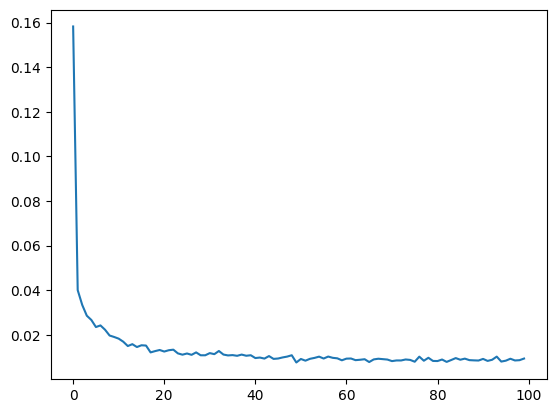

In [278]:
plt.plot(train_losses)

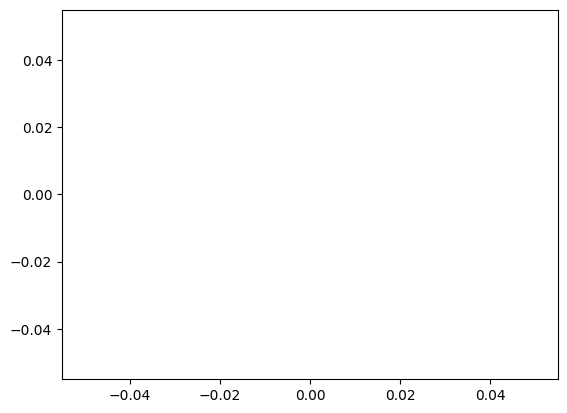

In [279]:
plt.plot(val_losses)

In [280]:
outputs = []
truths = []

model.eval()
with torch.no_grad():
    for X, y in test_loader:
        preds = model(X.to(device))
        outputs += preds.cpu()
        truths += y.cpu()

outputs = [i.item() for i in outputs]
otp = pd.DataFrame(outputs)
otp['nn'] = truths

otp.columns = ['outputs', 'actual']
otp

,outputs,actual
0,0.863607,tensor(1.0188)
1,0.833564,tensor(0.9776)
2,0.829257,tensor(1.0329)
3,0.784818,tensor(1.0274)
4,0.812457,tensor(1.0137)
...,...,...
103,0.900399,tensor(1.2556)
104,0.897274,tensor(1.2813)
105,0.909476,tensor(1.2937)
106,0.909344,tensor(1.2676)


[]

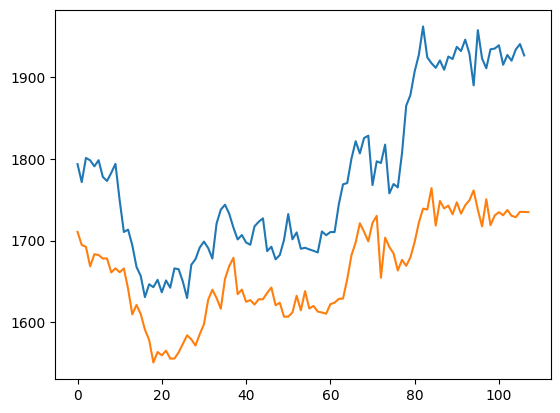

In [281]:
plt.plot(scaler_target.inverse_transform(otp)[:, 1])
plt.plot(scaler_target.inverse_transform(otp)[:, 0])

plt.plot()

In [282]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(scaler.inverse_transform(otp)[:-1, 1], scaler.inverse_transform(otp)[:-1, 0])*100

6.2397793814281535

In [283]:
results = pd.DataFrame()
results['actual'] = scaler.inverse_transform(otp)[:, 1]
results['predictions'] = scaler.inverse_transform(otp)[:, 0]
results['diff'] = results['actual'] - results['predictions']
results['diff'].fillna(0, inplace=True)
results['rolling_30d_diff'] = results['diff'].rolling(30).mean().fillna(0)
results['better_pred'] = results['predictions'] + results['rolling_30d_diff']
results['error2'] = results['actual'] - results['better_pred']

results

,actual,predictions,diff,rolling_30d_diff,better_pred,error2
0,1778.421301,1697.870180,80.551121,0.000000,1697.870180,80.551121
1,1757.031455,1682.279663,74.751792,0.000000,1682.279663,74.751792
2,1785.713339,1680.044788,105.668551,0.000000,1680.044788,105.668551
3,1782.893710,1656.983233,125.910477,0.000000,1656.983233,125.910477
4,1775.747605,1671.326541,104.421063,0.000000,1671.326541,104.421063
...,...,...,...,...,...,...
103,1901.315858,1716.963165,184.352693,172.649805,1889.612970,11.702888
104,1914.635899,1715.341379,199.294521,177.170323,1892.511702,22.124197
105,1921.052831,1721.673559,199.379272,181.063866,1902.737425,18.315407
106,1907.538418,1721.605170,185.933248,183.969778,1905.574948,1.963470


### So, prediction for the next day is 1901

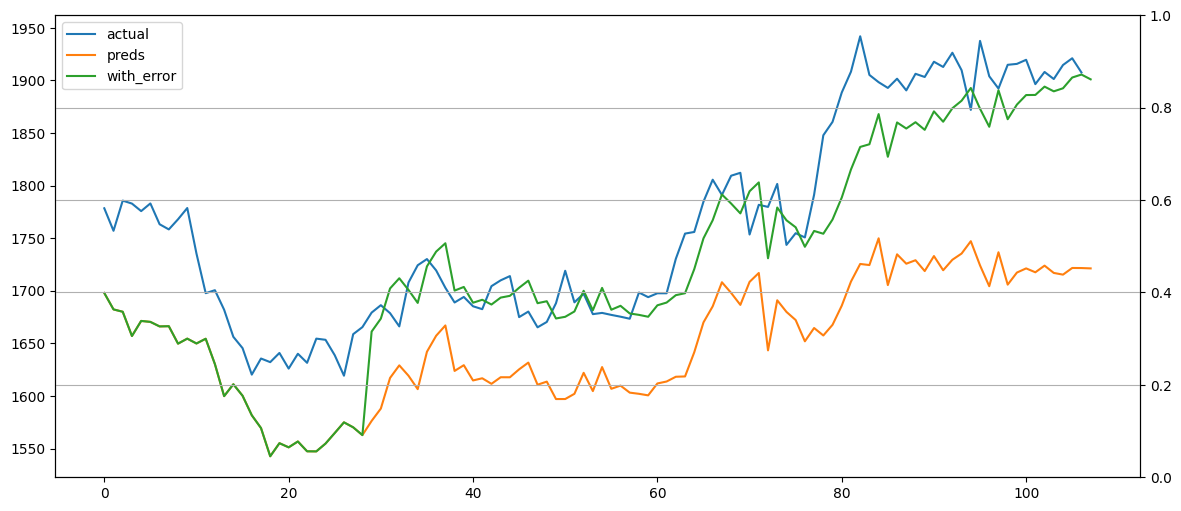

In [284]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax2 = ax1.twinx()
ax1.plot(results[['actual', 'predictions', 'better_pred']], label=['actual', 'preds', 'with_error'])
ax1.legend()

plt.grid('on')
plt.show()

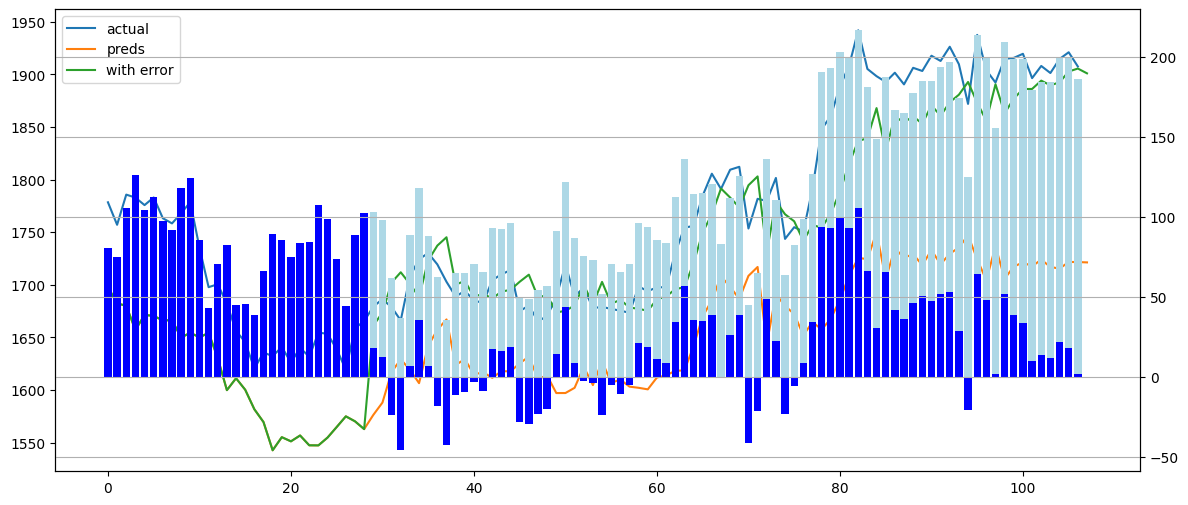

In [285]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax2 = ax1.twinx()
ax1.plot(results[['actual', 'predictions', 'better_pred']], label=['actual', 'preds', 'with error'])
ax1.legend()

ax2.bar(results.index, results['diff'], color="lightblue")
ax2.bar(results.index, results['error2'], color="blue")

plt.grid('on')
plt.show()

In [286]:
results['diff'].rolling(30).mean().fillna(0) # 30 day result mean

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
103    172.649805
104    177.170323
105    181.063866
106    183.969778
107    179.746184
Name: diff, Length: 108, dtype: float64

Results are not very good, but with 5% error, it's far better than other models.


*Also results can be improved with 30 days error mean, as noticed above.*

## Next day prediction

done above 👆🏻

In [298]:
# for i, batch in enumerate(test_loader):
#     if i==len(test_loader)-1:
#         print(batch)

In [299]:
# batch[0].shape, batch[1].shape, len(batch)

In [300]:
# scaler_target.inverse_transform(pd.DataFrame(batch[1]))

In [301]:
# hdfc.iloc[-12:]

In [302]:
# current

In [303]:
# next = pd.concat([features_df.iloc[-49:], pd.DataFrame(current).T], axis=0)
# next.shape

In [304]:
# next_features = next.iloc[:, :-1].values
# next_targets = next['target'].values.reshape(-1, 1)

# next_features_scaled = scaler_features.fit_transform(next_features)
# next_targets_scaled = scaler_target.fit_transform(next_targets)
        
# next_scaled_df = pd.DataFrame(
#     np.column_stack([next_features_scaled, next_targets_scaled.flatten()]),
#     columns=list(available_features) + ['target']
# )
        
# # X_next, y_next = create_sequences(next_scaled_df, seq_length)
# # X_next.shape, y_next.shape

# # next_features_scaled.shape, next_targets_scaled.shape
# next_scaled_df.shape

In [305]:
# next = torch.tensor(next_scaled_df.iloc[:, :-1].to_numpy().reshape(1, 50, 21), dtype=torch.float32)
# next.shape

In [306]:
# model.eval()
# with torch.no_grad():
#     preds = model(next.to(device))
#     preds2 = model(batch[0].to(device))
# #     for X, y in test_loader:
# #         preds = model(X.to(device))
# #         outputs += preds.cpu()
# #         truths += y.cpu()

# # outputs = [i.item() for i in outputs]
# # otp = pd.DataFrame(outputs)
# # otp['nn'] = truths

# # otp.columns = ['outputs', 'actual']
# # otp

# preds, preds2, batch[1]